# **ASSIGNMENT TASK**

Create a model that can predict the salary of the employee based on his/her age

Deploy the same with sample application (Refer ModelImplementor book)


# **DATA PREPROCESSING**

**Importing Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('SalaryGender.csv')
data.head()

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


Find the no of records and features in the data

In [0]:
data.shape

(100, 4)

Find the detailed description about the data

In [0]:
data.describe()

,Salary,Gender,Age,PhD
count,100.000000,100.000000,100.000000,100.000000
mean,52.524500,0.500000,46.880000,0.390000
std,42.220933,0.502519,15.271469,0.490207
min,0.250000,0.000000,20.000000,0.000000
25%,20.000000,0.000000,31.500000,0.000000
50%,39.300000,0.500000,49.000000,0.000000
75%,75.500000,1.000000,60.000000,1.000000
max,190.000000,1.000000,77.000000,1.000000


Find the information about data - DataType of features, Missing values 

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  100 non-null    float64
 1   Gender  100 non-null    int64  
 2   Age     100 non-null    int64  
 3   PhD     100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


**Identify the type of data for each column --- Numerical, Categorical , Ordinal**
```  
 Sr   Column  Non-Null Count  Dtype  
---  ------   --------------  -----  
 0.   Salary   100 non-null    float64   -------> NUMERIC (Continuous)
 1.   Gender   100 non-null    int64     -------> Categorical **BUT** transformed
 2.   Age      100 non-null    int64     -------> NUMERIC (Continuous)
 3.   PhD      100 non-null    int64     -------> Categorical **BUT** tramsfromed
 ```

Remove any Duplicate data

In [0]:
data.drop_duplicates(inplace=True)

In [0]:
data.reset_index(drop=True, inplace=True)

Find the relationship between the Age and Salary 

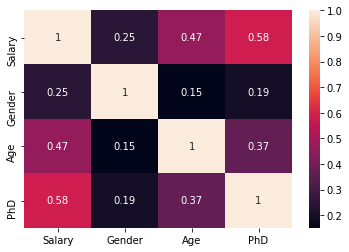

In [0]:
sns.heatmap(data.corr(), annot=True)

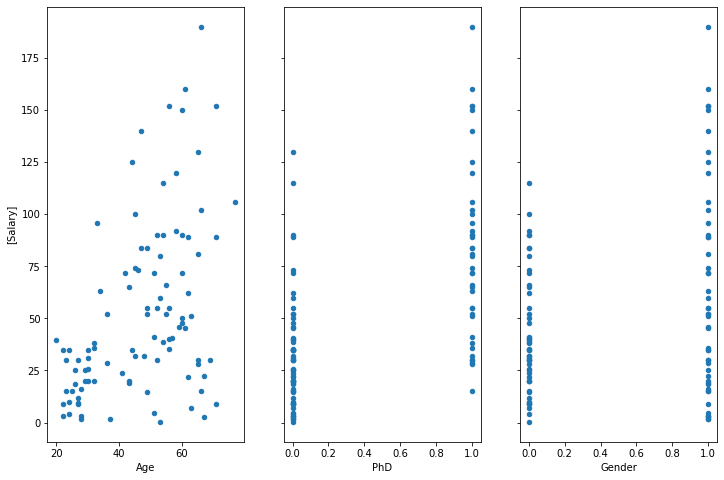

In [0]:
fig, axes = plt.subplots(1,3, sharey=True)
data.plot(kind='scatter', x='Age', y=['Salary'], ax=axes[0],figsize=(12,8))
data.plot(kind='scatter', x='PhD', y=['Salary'], ax=axes[1])
data.plot(kind='scatter', x='Gender', y=['Salary'], ax=axes[2])

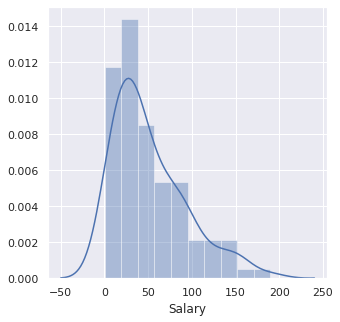

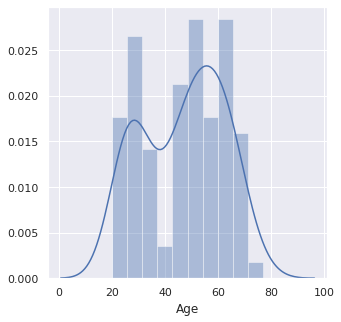

In [0]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data['Salary'], bins=10)
plt.show()
sns.distplot(data['Age'],bins=10)
plt.show()

**HANDLING OUTLIERS**

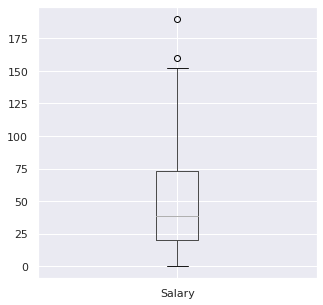

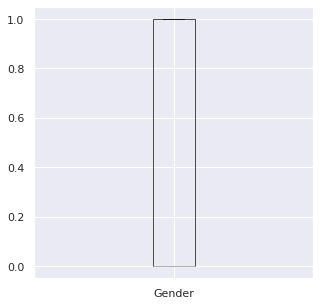

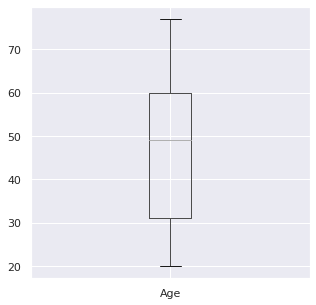

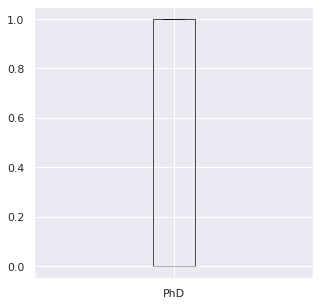

In [0]:
for column in data:
    plt.figure()
    data.boxplot([column])

USE PYTHON CODE:

In [0]:
continuous_data = ['Age','Salary']
data[continuous_data].head()

,Age,Salary
0,47,140.0
1,65,30.0
2,56,35.1
3,23,30.0
4,53,80.0


In [0]:
# Defining a function to calculate the lower bound and upper bound and if there exists any outlier
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.nanpercentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 print("Lower bound: ", lower_range, "Upper bound: ", upper_range)
 if ((datacolumn < lower_range).any() or (datacolumn > upper_range).any()):
  outliers = (datacolumn < lower_range).sum() + (datacolumn > upper_range).sum()
  print(outliers, " No of Outliers present: ", "\n")
 else:
  print("No Outliers Detected", "\n")
 return lower_range,upper_range

In [0]:
# Running loop over the Data Frame with Numeric (Continuous) Values
lowerbound = []
upperbound = []
for column in continuous_data:
  print("Outlier check for column: ",column)
  lowerbound_column, upperbound_column = outlier_treatment(data[column])
  lowerbound.append(lowerbound_column)
  upperbound.append(upperbound_column)

Outlier check for column:  Age
Lower bound:  -12.5 Upper bound:  103.5
No Outliers Detected 

Outlier check for column:  Salary
Lower bound:  -60.25 Upper bound:  153.75
2  No of Outliers present:  



In [0]:
#Drop the column with the outliner values
for i,column in enumerate(continuous_data):
  data.drop(data[(data[column] < lowerbound[i]) | (data[column] > upperbound[i])].index, axis=0, inplace=True)

Reset the index after deleting records

In [0]:
data.reset_index(drop=True, inplace=True)

Check the No of Records and fearures in the data set

In [0]:
data.shape

(97, 4)

**HANDLING INAPPROPRIATE DATA**

If your data is **continous** numerical data, check with reference to domain whether
the following parameters are valid or not:

  1. Negative Numbers are allowed or not.
  2. Positive Numbers are allowed or not.
  3. Complex Numbers are allowed or not.
  4. Decimals are allowed or just integers are expected

**Analysis:**
 1.   Age    ----> Numerical (Continuous)  ---> No -ve, Yes +ve, No CN, No Decimals
 3.   Salary ----> NUMERICAL (Continuous)  ---> No -ve, Yes +ve, No CN, No Decimals

In [0]:
data[(data.Age < 0) | (data.Salary < 0 )]

,Salary,Gender,Age,PhD


If your columns are **categorical** , perform the following steps:
  1. Get the unique values of column
  2. Handle the data which has Spelling Errors, Case Errors(Lowercase/Uppercase/CamelCase)
  3. Check whether the categories show in the unique values match the domain spec. If there exists an unusual category, delete that record itself.

**Analysis:**
  1. Gender ----> Categorical but transformed
  2. PhD    ----> Categorical but transformed  

In [0]:
data.Gender.unique()

array([1, 0])

In [0]:
data.PhD.unique()

array([1, 0])

**HANDLING MISSING VALUES**

In [0]:
data.isnull().any()

Salary    False
Gender    False
Age       False
PhD       False
dtype: bool

**SEPARATING FEATURES AND LABELS**

For Sklearn users:

Rules for Regression:
 1. Features and label must be in the form of numpy array
 2. Features must be in 2d array
 3. Label must be in 2d array

In [0]:
features = data.iloc[:,1:].values
label = data.loc[:,['Salary']].values

In [0]:
print("Dimension on feature is: ", features.ndim,"\t","Dimension of label: ", label.ndim, "\n")
#features.head(3)

Dimension on feature is:  2 	 Dimension of label:  2 



# **ML CODING BEGINS**

Before you initiate the coding, you must know two things from your data scientists:
 1. Approved Significance level for the project   -     **0.2**
 2. Timeline to develop and deploy the model      -     **Practise Project**


**Split the data into train and test data**

 1. Create Train Test Split
 2. Build the model
 3. Check the Quality of the Model
 4. If Satisfied, perform Deployment ; else go to step 2

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,
                label,
                test_size=0.2,
                random_state=5)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77, 3), (20, 3), (77, 1), (20, 1))

Build the model - Only fit is required for the Model

In [0]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Check the Quality of the Model**

 1. Ensure your **test score > train score** (Model must be perform best on UNKNOWN DATA !!!)
 2. Ensure your test score >= (1 - SL):  **0.80**

In [0]:
print('Train Score: ', classifier.score(X_train,y_train))
print('Test Score: ', classifier.score(X_test,y_test))

Train Score:  0.39884217176564957
Test Score:  0.3997419638422284


Data Randomization always give different results. Testing best random value.

In [0]:
for i in range(1,3000):
    X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score >= 0.80:
        print("Test S {}, Train Score {}, RandomSeed {}".format(test_score,train_score,i))

Test S 0.871342425155868, Train Score 0.32800690195819127, RandomSeed 2637


**OBSERVATION:** When the duplicate is removed, the accuracy turns out to be 87%, however if the duplicate is not removed, the accuracy is only 76%

**REBUILDING THE MODEL WITH RANDOM STATE = 2637**

In [0]:
X_train,X_test,y_train,y_test = train_test_split(features,
                label,
                test_size=0.20,
                random_state=2637)

finalClassifier = LinearRegression()
finalClassifier.fit(X_train,y_train)
print('Train Score: ', finalClassifier.score(X_train,y_train))
print('Test Score: ', finalClassifier.score(X_test,y_test))

Train Score:  0.32800690195819127
Test Score:  0.871342425155868


TARGET SIGNIFICANT LEVEL ATTAINED

# **PERFORM DEPLOYMENT**

In [0]:
import pickle
pickle.dump(finalClassifier , open('salaryPredictor.viraj' , 'wb') )

# **FEATURE SCALING - StandardScalar** (IGNORE)

Again spliting test and train according to random-state=102

In [0]:
# X_train,X_test,y_train,y_test = train_test_split(features,
#                 label,
#                 test_size=0.2,
#                 random_state=102)

In [0]:
# from sklearn.preprocessing import StandardScaler

# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# X_test = scalar.transform(X_test)

In [0]:
# X_train_frame = pd.DataFrame(X_train,columns=['Gender','Age','PhD'])
# X_train_frame.head()

Creating new model with scaled data

In [0]:
# from sklearn.linear_model import LinearRegression
# classifier_new = LinearRegression()
# classifier_new.fit(X_train,y_train)
# print(classifier_new.score(X_train,y_train))
# print(classifier_new.score(X_test,y_test))

# **USING ONLY AGE FEATURE** (IGNORE)

In [0]:
# feature_age = data.loc[:,['Age']]
# label_age = data['Salary']

In [0]:
# X_train,X_test,y_train,y_test = train_test_split(feature_age,
#                 label_age,
#                 test_size=0.2,
#                 random_state=102)

# classifier_age = LinearRegression()
# classifier_age.fit(X_train,y_train)
# print(classifier_age.score(X_train,y_train))
# print(classifier_age.score(X_test,y_test))